## Comparative Analysis - Time of Publications

This notebook contains just the comparative analysis of the time of publications for each of the five sources. The notebook will also lead to a compiled bar graph figure which will serve as a visualization in my final data story. Note: there's not alot of markdown in this comparison because I mainly needed this for visualization generation.

In [1]:
import os
import json
import random
import shutil
import datetime as dt
import calendar
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## run the functions notebook here
%run functions.ipynb

In [3]:
## open the corpus_index
cd_corp = json.load(open('../data/text/china_daily/cd_corpus_index.json'))
nyt_corp = json.load(open('../data/text/nyt/nyt_corpus_index.json'))
dt_corp = json.load(open('../data/text/daily_telegraph/dt_corpus_index.json'))
g_corp = json.load(open('../data/text/guardian/guardian_corpus_index.json'))
ht_corp = json.load(open('../data/text/hindustan_times/ht_corpus_index.json'))

In [4]:
my_date_cd=[]
for article in cd_corp[:32]:
    date=article['Date'][:7]
    my_date_cd.append(date)

for article in cd_corp[32:]:
    date=article['Date'].split('/')
    year = '20{}'.format(date[2])
    if len(date[0]) == 1:
        month = '0{}'.format(date[0])
    else:
        month = date[0]
    month_year = '{}-{}'.format(year,month)
    my_date_cd.append(month_year)
    
my_dist= Counter(my_date_cd)

<AxesSubplot:title={'center':'China Daily'}, xlabel='date', ylabel='# Articles'>

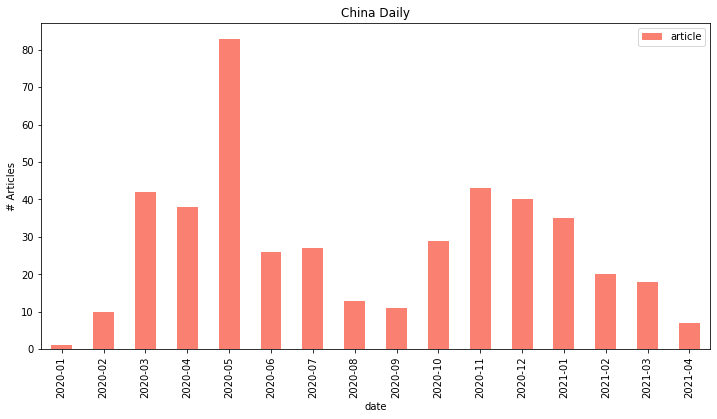

In [5]:
## bar graph of publications in each month
date_df_cd = pd.DataFrame.from_records(list(my_dist.items()), columns=['date','article'])
date_df_cd.sort_values('date').plot.bar(x='date',y='article', figsize=(12,6), color='salmon', title='China Daily', ylabel='# Articles')

In [6]:
dates_nyt=[]
for article in nyt_corp:
    date=article['Date'][:7]
    dates_nyt.append(date)
    
dates_dist_nyt= Counter(dates_nyt)

<AxesSubplot:title={'center':'NY Times'}, xlabel='date', ylabel='# Articles'>

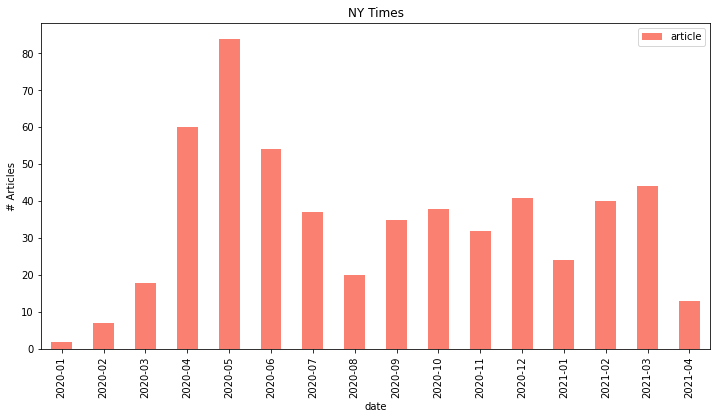

In [7]:
date_df_nyt = pd.DataFrame.from_records(list(dates_dist_nyt.items()), columns=['date','article'])
date_df_nyt.sort_values('date').plot.bar(x='date',y='article', figsize=(12,6), color='salmon',title='NY Times', ylabel='# Articles')

In [8]:
dates_dt=[]
for article in dt_corp:
    date=article['Date'][:7]
    dates_dt.append(date)
    
dates_dist_dt= Counter(dates_dt)

<AxesSubplot:title={'center':'The Daily Telegraph'}, xlabel='date', ylabel='# Articles'>

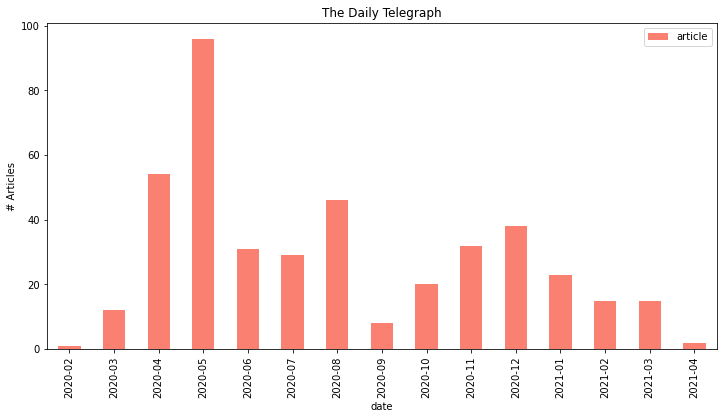

In [9]:
date_df_dt = pd.DataFrame.from_records(list(dates_dist_dt.items()), columns=['date','article'])
date_df_dt.sort_values('date').plot.bar(x='date',y='article', figsize=(12,6), color='salmon',title='The Daily Telegraph', ylabel='# Articles')

In [10]:
dates_g=[]
for article in g_corp:
    date=article['Date'][:7]
    dates_g.append(date)
    
dates_dist_g= Counter(dates_g)

<AxesSubplot:title={'center':'The Guardian'}, xlabel='date', ylabel='# Articles'>

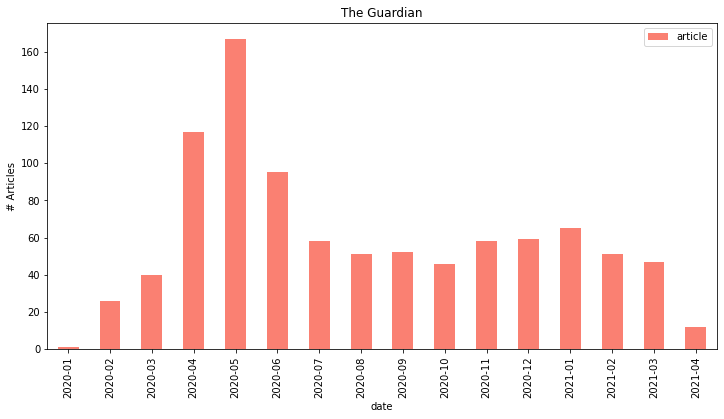

In [11]:
date_df_g = pd.DataFrame.from_records(list(dates_dist_g.items()), columns=['date','article'])
date_df_g.sort_values('date').plot.bar(x='date',y='article', figsize=(12,6), color='salmon',title='The Guardian', ylabel='# Articles')

In [12]:
dates_ht=[]
for article in ht_corp:
    date=article['Date'][:7]
    dates_ht.append(date)
    
dates_dist_ht= Counter(dates_ht)

<AxesSubplot:title={'center':'Hindustan Times'}, xlabel='date', ylabel='# Articles'>

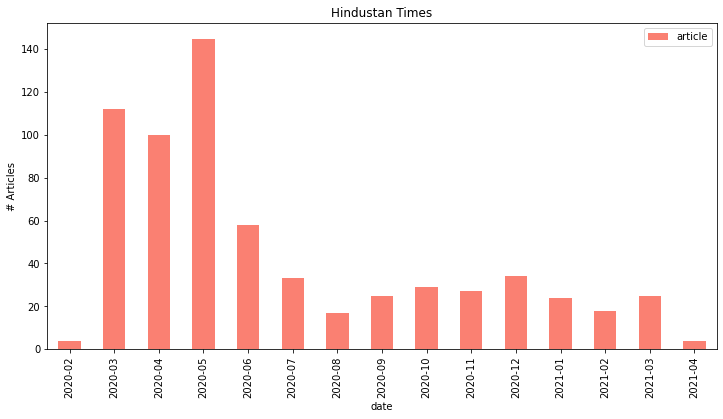

In [13]:
date_df_ht = pd.DataFrame.from_records(list(dates_dist_ht.items()), columns=['date','article'])
date_df_ht.sort_values('date').plot.bar(x='date',y='article', figsize=(12,6), color='salmon',title='Hindustan Times', ylabel='# Articles')

Text(0.1, 0.25, '# Articles Published')

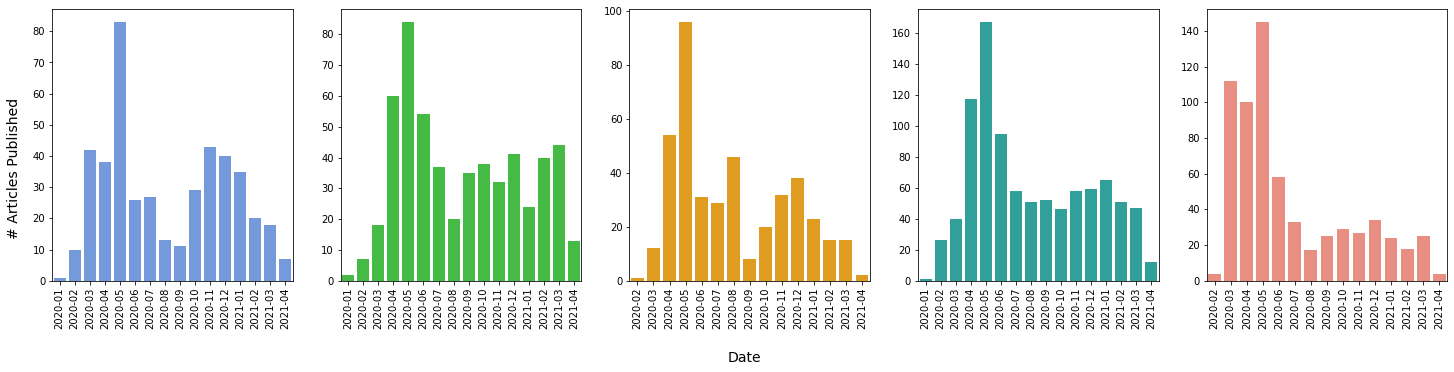

In [14]:
plt.rcParams['figure.figsize'] = [25,5]
fig, axs = plt.subplots(ncols=5)
sns.barplot(x='date', y='article', data=date_df_cd.sort_values('date'), ax=axs[0], color='cornflowerblue')
sns.barplot(x='date', y='article', data=date_df_nyt.sort_values('date'), ax=axs[1], color='limegreen')
sns.barplot(x='date',y='article', data=date_df_dt.sort_values('date'), ax=axs[2], color='orange')
sns.barplot(x='date',y='article', data=date_df_g.sort_values('date'), ax=axs[3], color='lightseagreen')
sns.barplot(x='date',y='article', data=date_df_ht.sort_values('date'), ax=axs[4], color='salmon')


for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set(xlabel=None, ylabel=None)

fig.text(0.5, -.1,'Date', fontsize=14)
fig.text(0.1, .25,'# Articles Published', fontsize=14, rotation=90) 

In [15]:
date_df_cd.to_csv('../final_data_story/visualizations/time_compare_cd')
date_df_nyt.to_csv('../final_data_story/visualizations/time_compare_nyt')
date_df_dt.to_csv('../final_data_story/visualizations/time_compare_dt')
date_df_g.to_csv('../final_data_story/visualizations/time_compare_g')
date_df_ht.to_csv('../final_data_story/visualizations/time_compare_ht')

Super cool to see that they follow a similar pattern. Peak in May and smaller peak in December-ish.